<a href="https://colab.research.google.com/github/LiemHuynh0311/homework6/blob/main/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


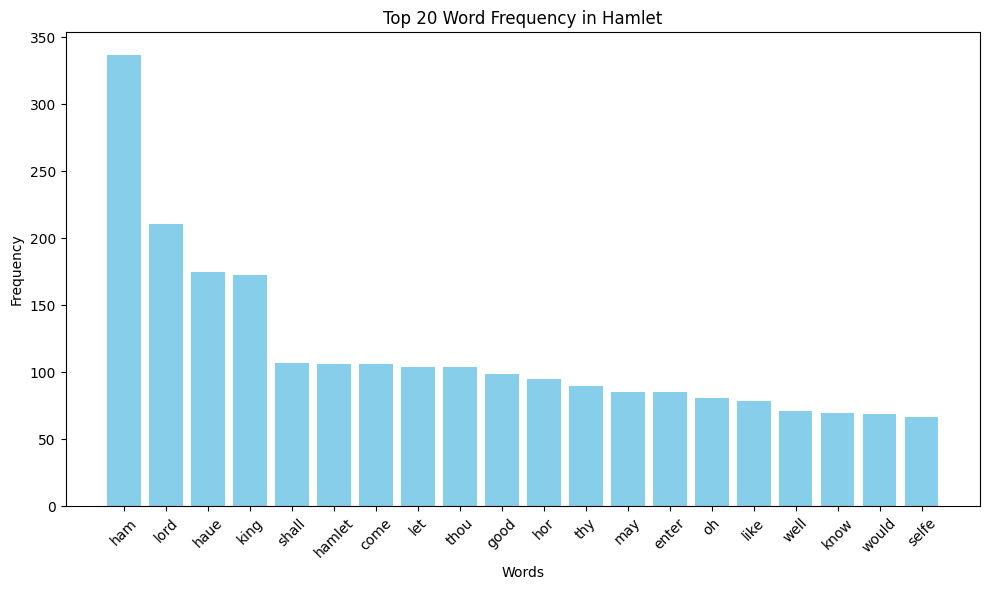

<ipython-input-11-617adfe4c16a>:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


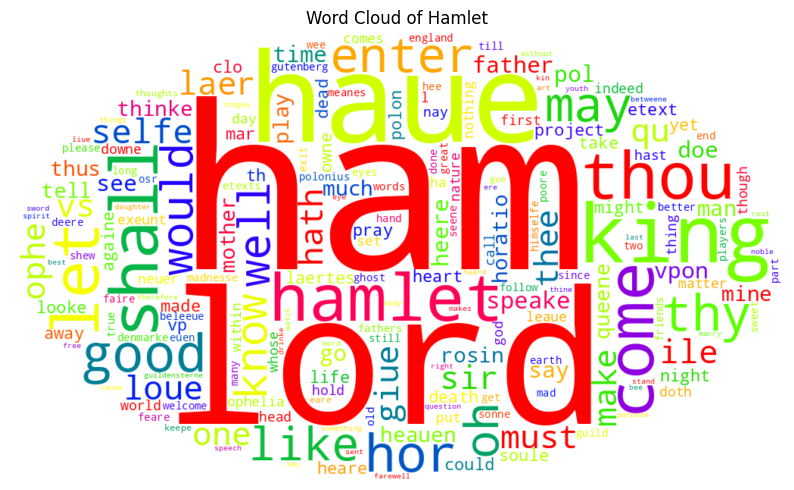

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import requests
import imageio
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Download the text of Hamlet
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

# Tokenize the text
words = word_tokenize(data)

# Filter out stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Calculate word frequencies
freq_dist = FreqDist(filtered_words)

# Generate the top-20 word frequency bar chart
top_words = freq_dist.most_common(20)
top_word_labels, top_word_counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(top_word_labels, top_word_counts, color='skyblue')
plt.title('Top 20 Word Frequency in Hamlet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Generate the word cloud
image_file = 'https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png'
mask_image = imageio.imread(image_file)

wordcloud = WordCloud(width=800, height=400, colormap='prism', mask=mask_image, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hamlet')
plt.show()